In [34]:
# imports 
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters
from pytz import timezone
register_matplotlib_converters()

In [35]:
# Plot ACF
def acf_plt(data):
    plot_acf(data)
    plt.title('Autocorrelation Function (ACF)')
    plt.show()

# Plot PACF
def dacf_plt(data):
    plot_pacf(data)
    plt.title('Partial Autocorrelation Function (PACF)')
    plt.show()

In [36]:

def fetch_crypto_data(symbol, start_date, end_date, priod):
    data = yf.Ticker(symbol)
    
    tickerDf = data.history(period=priod, start=start_date, end=end_date)
    tickerDf = tickerDf[['Close']]
    print(tickerDf)   
    
    return tickerDf
    

def get_data_and_plot(crypto, timeframe,start,end):
    data = fetch_crypto_data(crypto, start, end, timeframe)
    acf_plt(data['Close'])
    dacf_plt(data['Close'])
    return data
    


                              Close
Date                               
2022-10-31 00:00:00+00:00  0.999947
2022-11-01 00:00:00+00:00  0.999924
2022-11-02 00:00:00+00:00  0.999996
2022-11-03 00:00:00+00:00  1.000007
2022-11-04 00:00:00+00:00  1.000076
...                             ...
2023-10-27 00:00:00+00:00  1.000257
2023-10-28 00:00:00+00:00  1.000253
2023-10-29 00:00:00+00:00  1.000387
2023-10-30 00:00:00+00:00  1.000572
2023-10-31 00:00:00+00:00  1.000315

[366 rows x 1 columns]


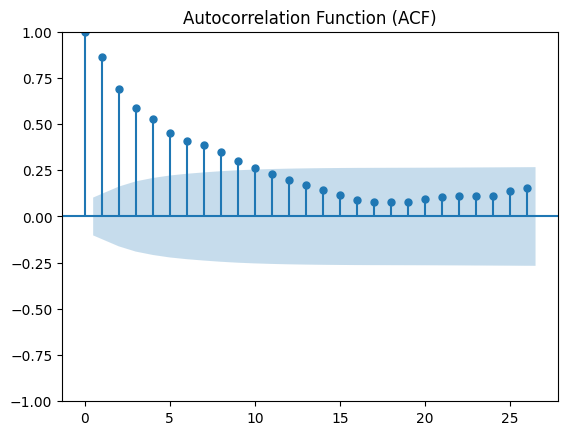

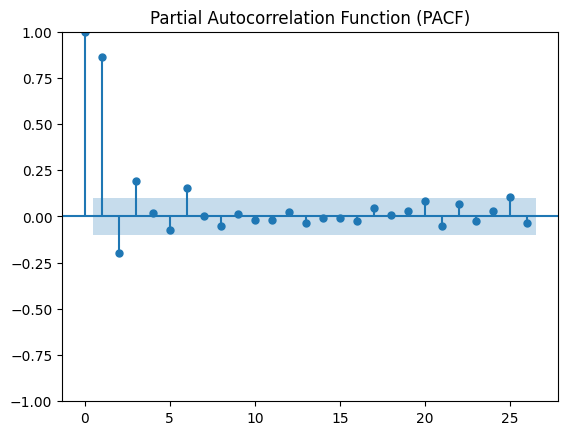

In [37]:
# main cell
train_end = datetime(2023,10,1, tzinfo=timezone('Asia/Tehran'))
test_end = datetime(2023,11,1, tzinfo=timezone('Asia/Tehran') )

start_date = datetime(2022, 11, 1, tzinfo=timezone('Asia/Tehran'))
end_date = datetime(2023, 11, 1, tzinfo=timezone('Asia/Tehran'))

data = get_data_and_plot('USDT-USD', '1d', start_date,end_date)


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  336
Model:                 ARIMA(3, 0, 7)   Log Likelihood                2137.947
Date:                Wed, 13 Dec 2023   AIC                          -4251.895
Time:                        03:15:41   BIC                          -4206.089
Sample:                    10-31-2022   HQIC                         -4233.635
                         - 10-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0002      0.000   4284.116      0.000       1.000       1.001
ar.L1          1.2366      0.011    114.722      0.000       1.215       1.258
ar.L2         -0.6627      0.010    -64.575      0.0

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


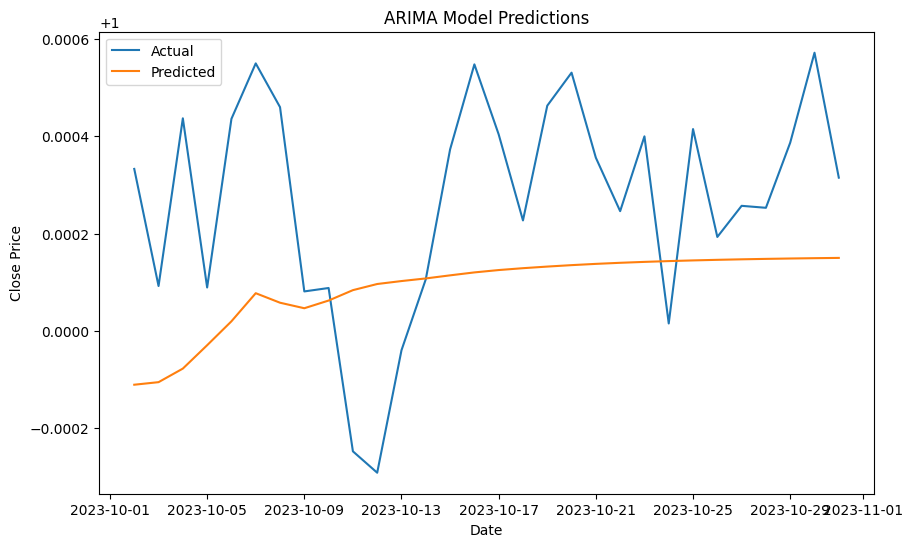

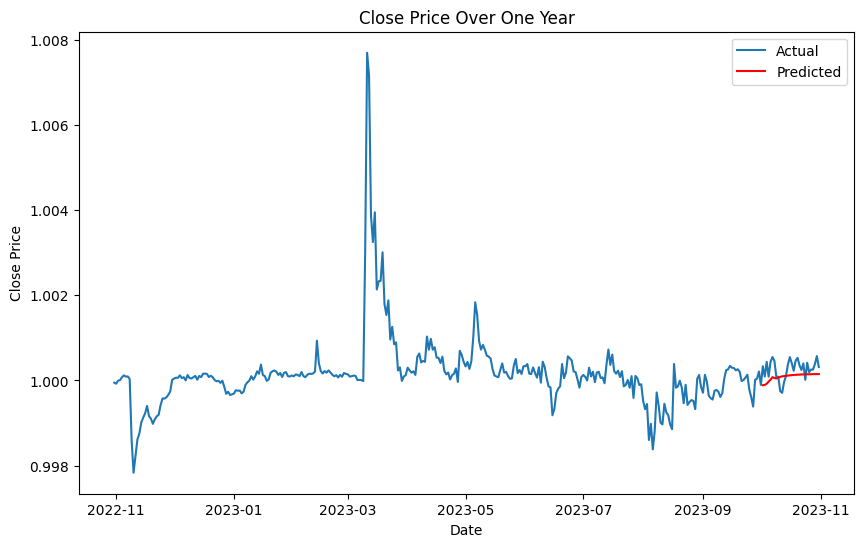

In [73]:

# train_data = data[:train_end]
# test_data = data[train_end + timedelta(days=1):test_end]
# train_end = train_end.tz_localize(data.index.tz)

# train_end = train_end.replace(tzinfo=data.index.tz)
# test_end = test_end.replace(tzinfo=data.index.tz)


train_data = data.loc[:train_end]#.loc???
test_data = data.loc[train_end + timedelta(days=1):test_end]
# -------------------------
model = ARIMA(train_data, order=(3,0,7))
model_fit = model.fit()
print(model_fit.summary())
# print('------\n',test_data)
# print('++++++\n',data)
# print('******\n',train_end)
# print(test_end)

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
# predictions = model_fit.predict(start=start_date, end=train_end)
# print('predictions', predictions,'||||||||||||||')

# test_data = test_data.dropna()
# predictions = predictions.dropna()

residuals = test_data['Close'] - predictions

# print(test_data,'\\\\\\\\\\\\\\\\')
# print(predictions,'/////////////')
# plt.figure(figsize=(10,4))

# plt.plot(data[-14:])
# plt.plot(predictions)

# plt.legend(('Data', 'Predictions'), fontsize=16)

# print(residuals)
# print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))
epsilon = 1e-10  # small constant
mape = np.mean(np.abs((residuals + epsilon) / (test_data['Close'] + epsilon)))
print('Mean Absolute Percent Error:', round(mape, 4))
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
# print(test_data['Close'].index)
# print(predictions.index)


# Plot the actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['Close'], label='Actual')

# Plot the predicted values
plt.plot(predictions.index, predictions, label='Predicted')

# Set the title and labels
plt.title('ARIMA Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Plot the entire year's data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Actual')

# Plot the predicted values
plt.plot(predictions.index, predictions, label='Predicted', color='red')

# Set the title and labels
plt.title('Close Price Over One Year')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [64]:
x = -64
try:
    x = model_fit.params['ma.L1']
except:
    print("33")
print(x)

0.3985752811547565


In [65]:
model_fit.params

const     1.000153e+00
ar.L1     6.825743e-01
ar.L2    -1.170731e-01
ar.L3     2.390190e-01
ma.L1     3.985753e-01
ma.L2     1.524319e-01
ma.L3    -1.062558e-01
ma.L4     2.436795e-02
sigma2    1.752239e-07
dtype: float64